### Meilenstein 3 - Centrality

In [15]:
import src.networkCentrality.myCentrality as MyCentr
import src.networkCentrality.basicCentralities as BasicCentr
import src.networkCentrality.eigenvectorCentrality as EigCentr

import test_.HelperClass as Hc
from src.printGraph import draw_graph as draw_graph
from src.Graph import Graph

from test_.plots.CentralityTestOnEconNetworks import compute_kendall

import matplotlib.pyplot as plt

### Unsere eigene Zentralität

Vielleicht aber nicht das kreativste :D. Allerdings habe ich das Ganze geschrieben, bevor wir die Closeness Centrality in der Vorlesung behandelt haben.

Alle Zentralitäten werden initialisiert oder auf 1 gesetzt, falls nicht initialisert werden soll.

Die Zentralität eines Knotens v berechnet sich nun folgendermaßen:

$\sum_{\text{w Knoten in G, } w\neq v} c(w)\cdot \frac{1}{dist(w, v)^p}$

p kann durch den Nutzer gesetzt werden, ist aber normalerweise einfach 2

Die Laufzeit ist demnach n-mal Breitensuche (Für die Berechnung der Distanzen), also $O(n\cdot m)$. Anschließend muss nochmal in allNodesCentrality über alle Knoten iteriert werden, also $O(n^2)$. 

Die Laufzeit kann analog zur Vorlesung verbessert werden, indem gleichverteilt k Knoten ausgewählt werden und die Breitensuche nur für diese Knoten gemacht wird. Damit haben wir einen Aufwand von:

$O(k\cdot (n + m) + n\cdot k) = O(k\cdot (n + m))$

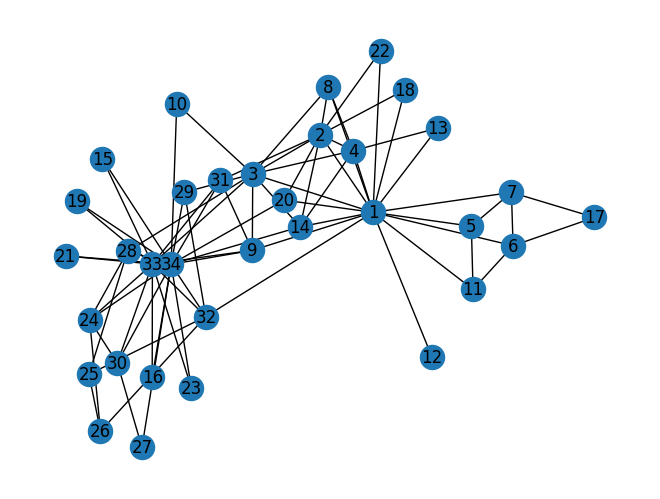

In [2]:
G = Graph("networks/out.ucidata-zachary_", mode=Graph.READ_MOD_EDGE_LIST)
draw_graph(G, label_on=True)

In [3]:
# all nodes centrality as a dictionary
print(MyCentr.own_centrality(G))

# single node centrality
print(MyCentr.own_centrality(G, node="3"))

# most central node (nodes if some nodes have the same value)
print(MyCentr.own_centrality(G, k=1))

# k-most central nodes
print(MyCentr.own_centrality(G, k=3))

{'1': 19.138888888888886, '2': 13.472222222222218, '3': 15.333333333333332, '4': 11.222222222222218, '5': 7.888888888888886, '6': 8.638888888888886, '7': 8.638888888888886, '8': 9.534722222222218, '9': 11.583333333333332, '10': 8.173611111111107, '11': 7.888888888888886, '12': 6.2499999999999964, '13': 6.9999999999999964, '14': 11.583333333333332, '17': 4.903333333333334, '18': 7.138888888888886, '20': 10.083333333333332, '22': 7.138888888888886, '24': 9.734444444444442, '26': 7.1180555555555465, '25': 7.1180555555555465, '28': 9.951388888888886, '29': 9.201388888888886, '30': 8.845555555555553, '27': 7.019166666666664, '31': 9.951388888888886, '32': 12.61111111111111, '33': 15.951388888888886, '15': 7.206666666666664, '16': 7.206666666666664, '19': 7.206666666666664, '21': 7.206666666666664, '23': 7.206666666666664, '34': 19.562499999999996}
15.333333333333332
(['34'], [19.562499999999996])
(['33', '1', '34'], [15.951388888888886, 19.138888888888886, 19.562499999999996])


In [4]:
# Nun haben wir verschiedene Optionen:
# Wir können die Zentralitäten initialisieren, bspw mit der Grad Zentralität
degree_cent = BasicCentr.degree_centrality(G)
print(MyCentr.own_centrality(G, init=degree_cent, k=3))

closeness_cent = BasicCentr.closeness_centrality(G)
print(MyCentr.own_centrality(G, init=closeness_cent, k=3))

(['9', '1', '3'], [2.451178451178452, 2.5404040404040416, 2.576599326599328])
(['3', '1', '34'], [6.981176756537224, 8.343486162890775, 8.492535357170722])


In [5]:
# Statt eine Breitensuche über alle Knoten zu machen, können wir k Knoten 
# gleichverteilt auswählen
print(MyCentr.own_centrality_approx(G, k_uniform_nodes=20, k=3))

(['3', '33', '1'], [15.333333333333332, 15.951388888888886, 19.138888888888886])


In [6]:
# außerdem kann die Distanz anders skaliert werden durch Nutzen von p
print(MyCentr.own_centrality(G, k=3, p=5))

(['33', '1', '34'], [12.408898373199591, 16.314171810699577, 17.225513599537024])


### Vergleich der Werte und der Laufzeiten für verschiedene Netzwerke

1) Werte Vergleich vom Karatenetzwerk unter Nutzung des Kendall Koeffizienten

In [7]:
# Dafür berechnen wir alle Zentralitäten für verschiedene Zentralitätsmaße
degree_centr = BasicCentr.degree_centrality(G)
closeness_centr = BasicCentr.closeness_centrality(G)
closeness_centr_approx = BasicCentr.closeness_centrality_approx(G)
eig_centr = EigCentr.eigenvector_centrality(G)

own_centr = MyCentr.own_centrality(G)
own_centr_approx = MyCentr.own_centrality_approx(G)

centralities = [degree_centr, closeness_centr, closeness_centr_approx, 
                eig_centr]

names = ["degree", "closeness", "closeness approx", "eigenvector"]

In [9]:
# Paarweise berechnen des Kendall Koeffizienten für 
# a) own Centrality 
# b) own Centrality Approximation

counter = 0
print("Vergleich mit meiner eigenen Zentralität:")
for centr in centralities:
    print(f"{names[counter]}: {compute_kendall(centr, own_centr)}")
    counter += 1

print("\nVergleich mit meiner eigenen approximativen Zentralität:")
counter = 0
for centr in centralities:
    print(f"{names[counter]}: {compute_kendall(centr, own_centr_approx)}")
    counter += 1

Vergleich mit meiner eigenen Zentralität:
degree: 0.8823529411764706
closeness: 0.8645276292335116
closeness approx: 0.5971479500891266
eigenvector: 0.8181818181818181

Vergleich mit meiner eigenen approximativen Zentralität:
degree: 0.49732620320855614
closeness: 0.44028520499108736
closeness approx: 0.5579322638146167
eigenvector: 0.2762923351158645


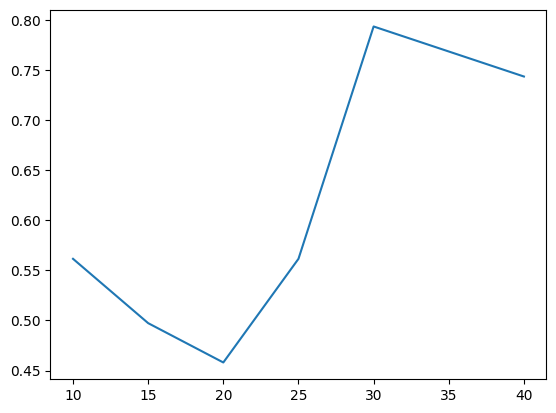

In [19]:
# Was passiert, wenn ich k bei der Approximation steigen lasse 
# -> Vergleich mit degree centrality

values = []
k_s = [10, 15, 20, 25, 30, 40]
for k in k_s:
    own_centr_approx = MyCentr.own_centrality_approx(G, k_uniform_nodes=k)
    values.append(compute_kendall(degree_centr, own_centr_approx))

plt.plot(k_s, values)
plt.show()

In [34]:
# Was passiert mit dem kendall Koeffizienten, wenn ich initialisiere
# -> Vergleich mit degree centrality

print("Degree Centrality:\n")

own_centr = MyCentr.own_centrality(G)
print(compute_kendall(degree_centr, own_centr))

own_centr = MyCentr.own_centrality(G, init=degree_centr)
print(compute_kendall(degree_centr, own_centr))

print("\nCloseness Centrality:\n")

own_centr = MyCentr.own_centrality(G)
print(compute_kendall(closeness_centr, own_centr))

own_centr = MyCentr.own_centrality(G, init=closeness_centr)
print(compute_kendall(closeness_centr, own_centr))

Degree Centrality:

0.8823529411764706
0.696969696969697

Closeness Centrality:

0.8645276292335116
0.8680926916221035


Es fällt auf, dass die die Übereinstimmung mit derdegree Zentralität stark sinkt, wenn initialisiert wird. Bei der Closeness Zentralität ist das nicht so stark zu beobachten. 

Das liegt vermutlich daran, dass die Degree Zentralität nur den Grad des Knotens betrachtet und nicht seine globale Vernetzung. Wird nun mit der degree Zentralität initialisiert, dann werden Knoten die Verbindungen zu anderen Knoten mit hohen Grad haben, besser bewertet.

Dadurch dass closeness die globale Vernetzung mit einbezieht, ist die Abweichung nicht so stark zu beobachten.